**Автор:** Сергей Шмаков

**Обновление этого документа** и не только публикуется на канале в Телеграм - https://telegram.me/smm_python

Другие мои площадки:
* ВКонтакте - https://vk.com/smmblog
* Youtube - https://youtube.com/smmblog
* Блог - http://freesmm.ru

# Урок 10: список тех кто вышел\вступил в группу ВКонтакте


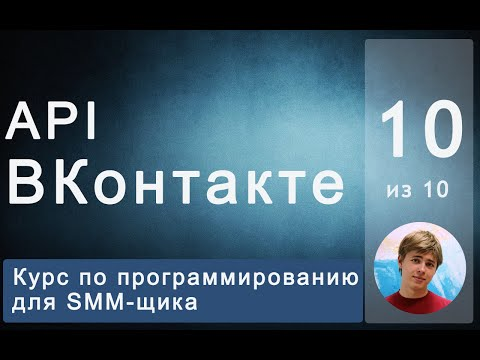

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo("Y9_pZF7SYyA")

Задача: узнать id тех кто:
> * вступил в группу за период (час\сутки и тд)
* вышел из группы за период (час\сутки и тд)

Для решения поставленной задачи нам потребуется:
* Метод, который возвращает всех участников сообщества - https://new.vk.com/dev/groups.getMembers
* Что-то в Python, а что - нужно более детально разобрать задачу

## Разбор задачи

1. У нас есть группа ВКонтакте, в которой находится на данный момент 6 пользователей *A = [1,2,3,4,5,6]*
2. Через определенное время, пускай это будет 1 час, в группе уже 8 пользователей. *B = [3,4,5,6,7,8,9,10]*

Как узнать кто из 10 пользователей остался, а кто пришёл новый при условии, что на каждый момент времени мы можем получить список участников группы с помощью метода - https://new.vk.com/dev/groups.getMembers ?

Решение:
1. Собираем всех участников в первый раз. Цифры считаем как ID пользователей Столбец А
2. Через час собираем всех участников снова - Столбец Б

| ---A        |---B    |
| -------------: | -------------: |
| 1 | --|
| 2 | --|
| 3 | 3 |
| 4 | 4 |
| 5 | 5 |
| 6 | 6 |
| --| 7 |
| --| 8 |
| --| 9 |
| --| 10|

Какие выводы можно сделать из наблюдения изменения состава участников?
* при первом сборе в группе было 6 человек, при втором стало 8, но это не значит, что подписалось 2 человека.
* при втором сборе участников в списке отстуствуют 1 и 2 ID , но добавились 7,8,9,10 
* *1,2* - это те, **кто вышел**, а *7,8,9,10* - те, **кто вступил** за 1 час в группу

Нарисую для наглядности картинку
![alt](https://api.monosnap.com/rpc/file/download?id=nu1IihEJ7a7ZXGq26yLiDAnzMg23su)<br>

* Те, что есть в **А**, но нет в **B** - **вышли**
* Те, что есть в **B**, но нет в **A** - **вступили**
![alt](https://api.monosnap.com/rpc/file/download?id=tt6S4Dqf6xqHLqLR53FafPkjkF9hjk)<br>



Как же нам с помощью Python получить вступивших\вышедших?

Для решения этой задачи в Python есть тип данных Set или "множество"
> **Set (множество)** -  представляет собой неупорядоченный набор уникальных элементов

Теория:
* http://www.programiz.com/python-programming/set
* http://pythonworld.ru/tipy-dannyx-v-python/mnozhestva-set-i-frozenset.html

Ниже приведены примеры работы с множествами, которые нам потребуются.

In [2]:
A = {1,2,3,4,5,6}
B = {3,4,5,6,7,8,9,10,10,10,10}
print(A)
print(B)

{1, 2, 3, 4, 5, 6}
{3, 4, 5, 6, 7, 8, 9, 10}


### Объединение - все уникальные элементы нескольких множеств
![alt](http://myzone.programiz.netdna-cdn.com/sites/tutorial2program/files/set-union.jpg)<br>


In [44]:
#Union - объединение - все уникальные элементы обоих множеств
union = A | B
union

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

### Пересечение - элементы, которые есть в множествах
![alt](http://myzone.programiz.netdna-cdn.com/sites/tutorial2program/files/set-intersection.jpg)<br>


In [45]:
#пересечение - элементы, которые есть в обоих множествах
ss = A & B
ss

{3, 4, 5, 6}

### Разница
Есть в А, но нет в В
![alt](http://myzone.programiz.netdna-cdn.com/sites/tutorial2program/files/set-difference.jpg)<br>


In [4]:
#есть в А, но нет в В

ss1 = A - B
ss1

{1, 2}

In [47]:
#есть в В, но нет в А

ss2 = B - A
ss2

{7, 8, 9, 10}

Теперь осталось лишь написать код, который будет получать список ID из группы, а потом с помощью множества выдавать тех, кто вступил и кто вышел.

Вариант кода для демонстрации будет самым простым, и который можно улучшить.

In [3]:
import requests
import csv
import time


group_id = 38369814
offset = 0
count = 1001 #потом переопределим

a = [] # первая отсечка
b = [] # вторая отсечка

#сбор списка пользователей на начало периода

print('цикл А')
while offset < count:
    r = requests.get('https://api.vk.com/method/groups.getMembers',params={'group_id': group_id,
                                                                           'offset':offset}).json()

    response = r['response']
    count = response['count']

    a.extend(response['users'])

    offset = offset + 1000
    print(offset)
    time.sleep(0.37)
print('first done')

#засыпаем на 10 минут
print('Time sleep 10 minuts')
time.sleep(10)    
    
#сбор списка пользователей на конец периода

offset = 0
count = 1001 #потом переопределим

print('цикл В')
while offset < count:
    r = requests.get('https://api.vk.com/method/groups.getMembers',params={'group_id': group_id,
                                                                           'offset':offset}).json()
    response = r['response']
    count = response['count']

    b.extend(response['users'])

    offset = offset + 1000
    print(offset)
    time.sleep(.37)
print('seconde done')

#с помощью множеств получаем тех кто вышел и тех, кто вступил
A = set(a)
B = set(b)

vishli = A - B
vstupili = B - A
print('Вышло пользователей:',len(vishli) ,vishli)
print('Вступило пользователей:',len(vstupili) ,vstupili)

цикл А
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
first done
Time sleep 10 minuts
цикл В
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
seconde done
Вышло пользователей: 0 Из группы вышли set()
Вступило пользователей: {928041} В группу вступили {928041}


## Домашнее задание

1. Использовать 1 функцию вместо 2х циклов
2. Придумать, как сделать так, чтобы скрипт собирал кто вышел\вступил в группу каждый час\день\любой период